In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [ ]:
#Print the value of the boston_dataset to understand what it contains. 
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
#Describe the data
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#The prices of the house are indicated by the variable MEDV,thus our target variable.
#Other variables are our features for price prediction.
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Adding target variable to our dataframe.
boston['PRICE'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **Data Preprocessing**

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

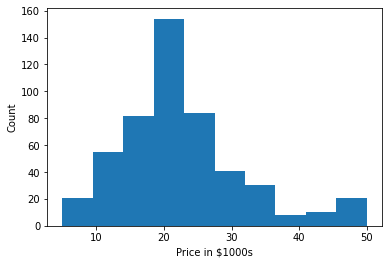

In [ ]:
plt.hist(boston['PRICE'])
plt.xlabel('Price in $1000s')
plt.ylabel("Count")
plt.show()

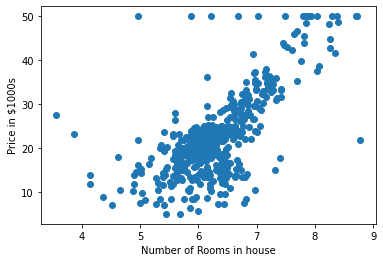

In [ ]:
plt.scatter(boston['RM'], boston['PRICE'])
plt.xlabel('Number of Rooms in house')
plt.ylabel('Price in $1000s')
plt.show()

# Q.Find the relation between an other feature and price

<function matplotlib.pyplot.show>

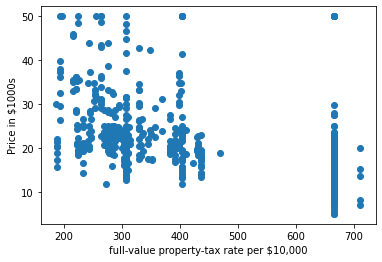

In [ ]:
plt.scatter(boston['TAX'],boston['PRICE'])
plt.xlabel('full-value property-tax rate per $10,000')
plt.ylabel('Price in $1000s')
plt.show

<function matplotlib.pyplot.show>

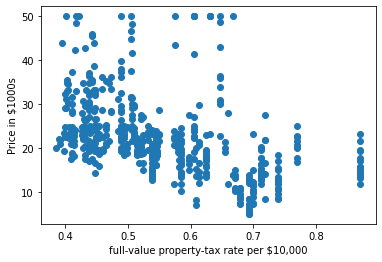

In [ ]:
plt.scatter(boston['NOX'],boston['PRICE'])
plt.xlabel('full-value property-tax rate per $10,000')
plt.ylabel('Price in $1000s')
plt.show

<function matplotlib.pyplot.show>

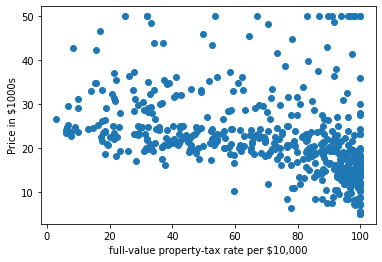

In [ ]:
plt.scatter(boston['AGE'],boston['PRICE'])
plt.xlabel('full-value property-tax rate per $10,000')
plt.ylabel('Price in $1000s')
plt.show

# Linear Regression for finding relation between Number of Rooms and Price of house

In [ ]:
X = boston.RM
y = boston.PRICE
m = len(y) # number of training example
print('number of training examples: ',m)

number of training examples:  506


In [ ]:
#Add new column (to accomodate for theta0)
X = X[:,np.newaxis]
y = y[:,np.newaxis]
print(X)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [ ]:
print(y)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


In [ ]:
#Initialize theta 
theta = np.zeros([2,1])
iterations = 15000

In [ ]:
#Alpha for gradient descent
alpha = 0.01
ones = np.ones((m,1))
print(ones)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [ ]:
# adding the intercept  (X0 = 1)
X = np.hstack((ones, X))

# Cost Computation

In [ ]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)

#for theta 0 and theta 1 both 0
print(J)

296.0734584980237


# Gradient Descent

In [ ]:
def gradientDescent(X, y, theta, alpha, m, iterations):

    for i in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta

theta = gradientDescent(X, y, theta, alpha, m, iterations)
print(theta)

[[-28.86822139]
 [  8.18994238]]


In [ ]:
J = computeCost(X, y, theta)
print(J)
#The cost has surely reduced from the initial value of 296.
#Will it get better if we have more iterations?

22.0076825307749


In [ ]:
#We are getting close to the best value (ideally 0 ,practically something small)

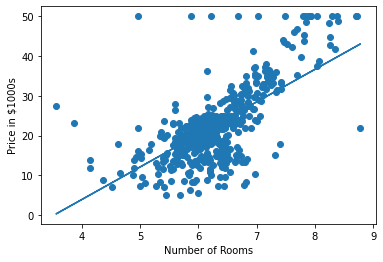

In [ ]:
plt.scatter(X[:,1], y)
plt.xlabel('Number of Rooms')
plt.ylabel('Price in $1000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

Q. Should be use a fix number of iterations or set it based on some parameters? What should the ideal situation be for the iteration to stop.

Task: Check if the increasing the iterations helps further reduce the cost function.

# Multi Variate Linear Regression

In [ ]:
X = boston.iloc[:,0:-1] # read first two columns into X
y = boston.iloc[:,-1] # read the third column into y
m = len(y) # no. of training samples

In [ ]:
X.shape

(506, 13)

# Feature Normalization
By looking at the values, we see that some columns have huge values like age has a range 10x of the number of rooms.

When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [ ]:
#Normalizing the input features
X = (X - np.mean(X))/np.std(X)

In [ ]:
#Adding intercept
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 500
theta = np.zeros((X.shape[1],1))
#Why did we use X.shpae[1]?

y = y[:,np.newaxis]

In [ ]:
#Cost Computation
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCostMulti(X, y, theta)
print(J)

296.0734584980237


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[22.3847549 ]
 [-0.67793577]
 [ 0.59332889]
 [-0.38134847]
 [ 0.78032984]
 [-1.04683386]
 [ 3.14221458]
 [-0.15528495]
 [-2.16315105]
 [ 0.93042405]
 [-0.53615121]
 [-1.84736394]
 [ 0.8938237 ]
 [-3.45310347]]


In [ ]:
J = computeCostMulti(X, y, theta)
print(J)
#The cost has reduced. 
#Can it reduce further?

11.345151495349167


# Try multivariate regression with selected features like age,crim,zm, tax and any feature of your choice.

In [ ]:
X = boston.iloc[:,6:8] # taking AGE and DIS as two variables 
y = boston.iloc[:,-1] # taking PRICE as y
m = len(y) # no. of training samples
iterations1 = 1500

In [ ]:
X.shape
print(X)

      AGE     DIS
0    65.2  4.0900
1    78.9  4.9671
2    61.1  4.9671
3    45.8  6.0622
4    54.2  6.0622
..    ...     ...
501  69.1  2.4786
502  76.7  2.2875
503  91.0  2.1675
504  89.3  2.3889
505  80.8  2.5050

[506 rows x 2 columns]


In [ ]:
y.shape
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [ ]:
X = (X - np.mean(X))/np.std(X)

In [ ]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 500
theta = np.zeros((X.shape[1],1))

y = y[:,np.newaxis]

In [ ]:
#Cost Computation
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCostMulti(X, y, theta)
print(J)

296.0734584980237


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations1):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[22.53279993]
 [-3.90978276]
 [-0.61447118]]


In [ ]:
J = computeCostMulti(X, y, theta)
print(J)

36.114673586576075
